In [1]:
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt

In [2]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [3]:
train_X.shape

(60000, 28, 28)

In [4]:
train_y[0]

9

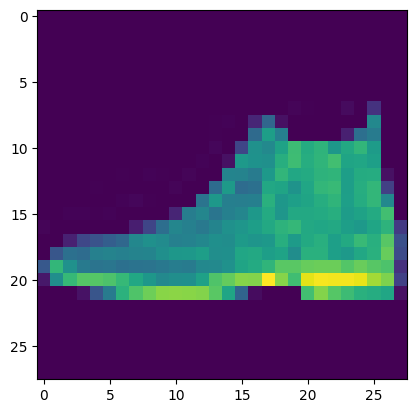

In [5]:
plt.imshow(test_X[0,...])

In [6]:
test_y.shape

(10000,)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Class Examples

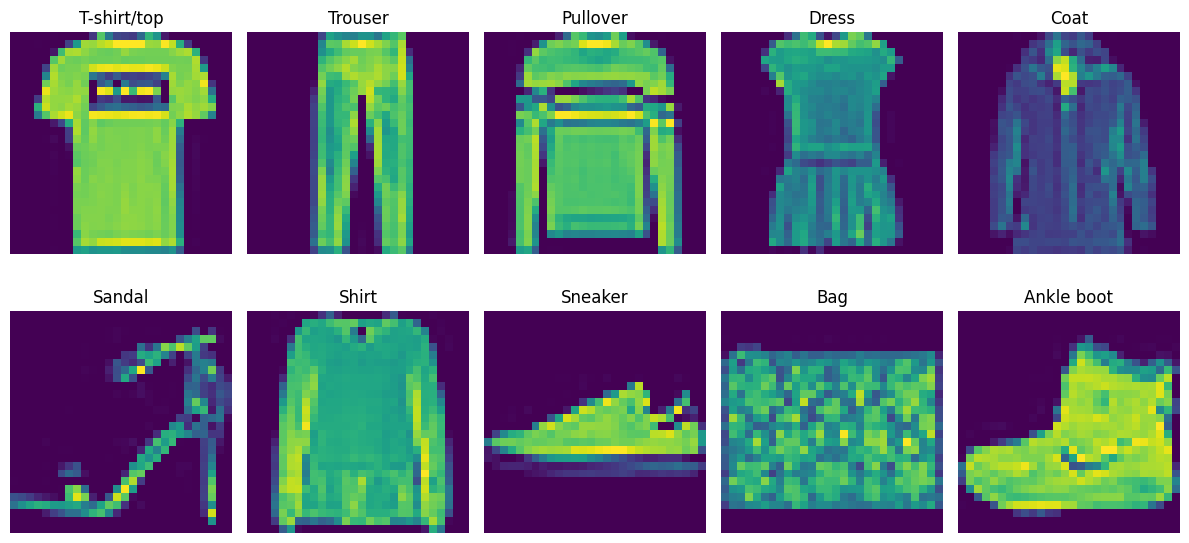

In [8]:
num_images = len(set(train_y))
num_rows = 2
num_cols = num_images // num_rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Flatten the axes array if it's more than 1D
if num_rows > 1:
    axes = axes.flatten()

# Loop through the images and plot on each subplot
for i in range(num_images):
    ax = axes[i]
    ax.imshow(train_X[np.where(train_y == i)[0][0]])
    ax.axis('off')

    # Set the title for the current subplot
    title = class_names[i]
    ax.set_title(title)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Class Distribution

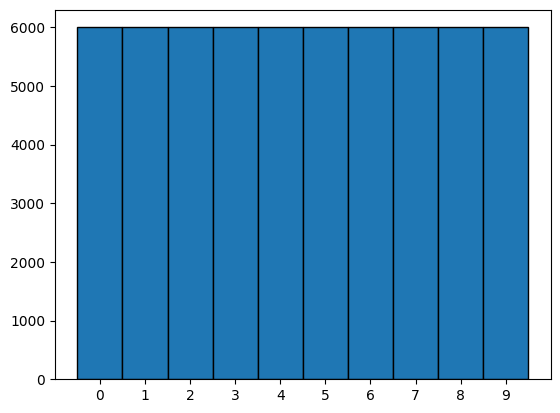

In [9]:
plt.hist(train_y, bins=np.arange(len(set(train_y))+1)-0.5, ec='black')
plt.xticks(range(len(set(train_y))))
plt.show()

### Pixel Intensity Distribution

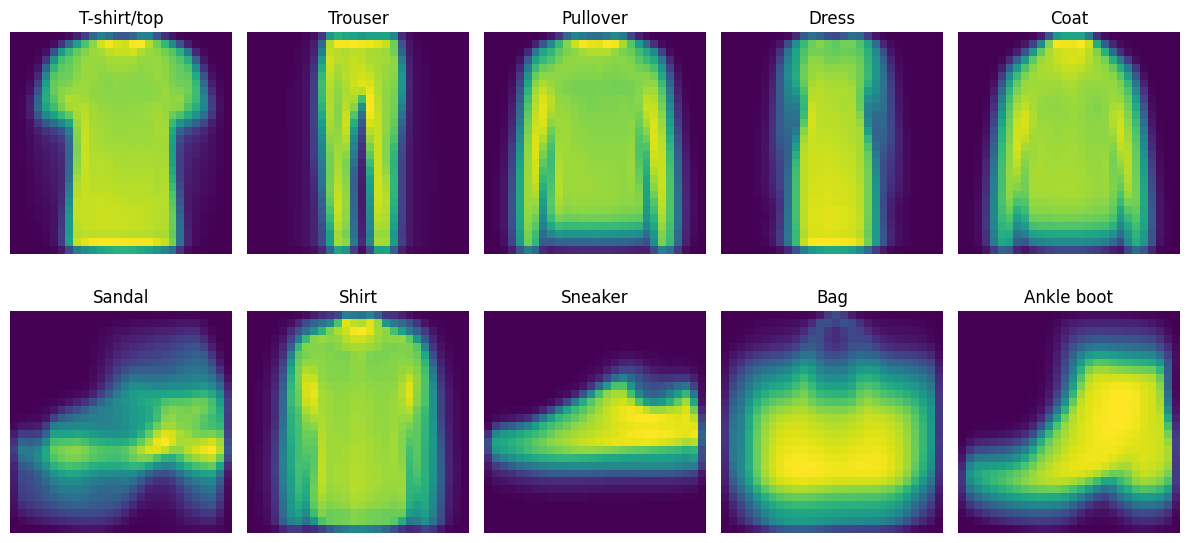

In [10]:
class_intensity = []
for i in set(train_y):    
    class_intensity += [train_X[np.where(train_y == i)].sum(axis=0)]

num_images = len(class_intensity)
num_rows = 2
num_cols = num_images // num_rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Flatten the axes array if it's more than 1D
if num_rows > 1:
    axes = axes.flatten()

# Loop through the images and plot on each subplot
for i in range(num_images):
    ax = axes[i]
    ax.imshow(class_intensity[i])
    ax.axis('off')

    # Set the title for the current subplot
    title = class_names[i]
    ax.set_title(title)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
y_sparse_train = np.zeros([60000,10])
y_sparse_test = np.zeros([10000,10])

In [12]:
for idx in range(60000):
    y_sparse_train[idx,train_y[idx]] = 1

for idx in range(10000):
    y_sparse_test[idx,test_y[idx]] = 1

In [13]:
y_sparse_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [14]:
y_sparse_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [15]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [16]:
model =  Sequential()

In [17]:
model.add(Flatten(input_shape=(28,28)))

In [18]:
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = "categorical_crossentropy", optimizer=SGD(learning_rate=0.0001),metrics=["accuracy"])

In [21]:
history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = 128, epochs=20)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 13.3493 - accuracy: 0.6668 - val_loss: 6.3471 - val_accuracy: 0.7256
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 4.5775 - accuracy: 0.7387 - val_loss: 3.6957 - val_accuracy: 0.7354
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 2.6482 - accuracy: 0.7363 - val_loss: 2.1995 - val_accuracy: 0.7216
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 1.6550 - accuracy: 0.7212 - val_loss: 1.5248 - val_accuracy: 0.7115
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 1.2662 - accuracy: 0.7176 - val_loss: 1.2749 - val_accuracy: 0.7082
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 1.0951 - accuracy: 0.7219 - val_loss: 1.1259 - val_accuracy: 0.7145
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.9928 - accuracy: 0.7296 - val_loss: 1.0436 - val_accuracy: 0.7185
Epoch

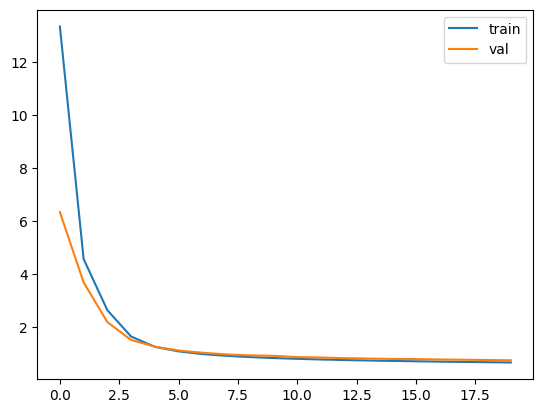

In [22]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

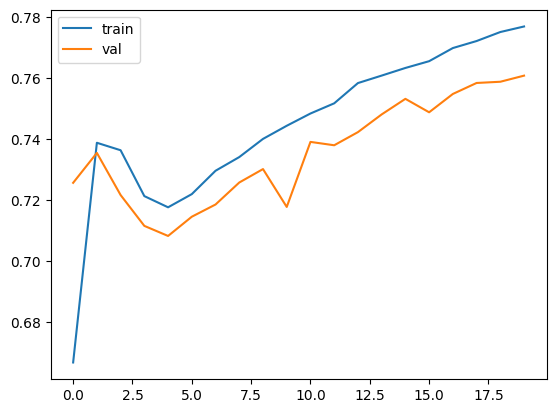

In [23]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()